<a href="https://colab.research.google.com/github/donw385/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [2]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation
#low p value is rows / cols dependent


ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [3]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*
# low p value not normal distribution

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=32.234038705743096, pvalue=1.0010768775034139e-07)


In [4]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# method for testing whether samples originate from the same distribution.
#null hypothesis is samples come from populations with the same distribution
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [8]:
#number in parenthesis is degrees of freedom
# When df > 90, the chi-square curve approximates the normal distribution
from scipy.stats import chi2

chi2_5 = chi2(5)
chi2_5

In [9]:
chi2_5.mean()

5.0

In [15]:
chi2_5.median()

4.351460191095526

In [0]:
chi2_500 = chi2(500)


In [0]:
# https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html

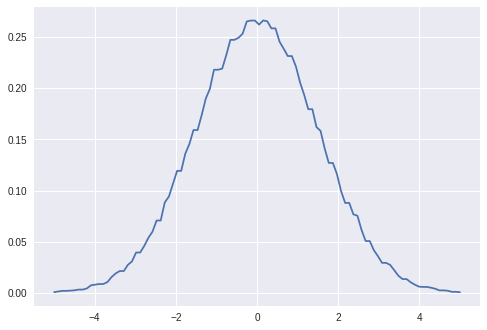

In [14]:
import scipy
import matplotlib.pyplot as plt
hist = np.histogram(data, bins=100)

data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)
X = np.linspace(-5.0, 5.0, 100)
hist_dist = scipy.stats.rv_histogram(hist)
plt.plot(X, hist_dist.pdf(X), label='PDF')

In [23]:
# How do I test "how normal" a chisquare(500) is?
from scipy.stats import normaltest

normaltest(chi2_500.rvs(100000))



NormaltestResult(statistic=211.18435134950127, pvalue=1.3864390187753883e-46)

In [26]:
# Let's calculate chi square test statistic, first by hand

# 1 male wants to eat outside, 2 inside
# 2 females want to eat outside, 1 inside
chi_data = [[1, 2], [2, 1]]

import pandas as pd
chi_data = pd.DataFrame(chi_data, columns=['Outside', 'Inside'])
chi_data

,Outside,Inside
0,1,2
1,2,1


In [30]:
# Let's just type out/explain the margin counts
# Total number of males (first row) = 3
# Total number of females (second row) = 3
# Total number of people who prefer outside = 3
# Total number of people who prefer inside = 3

# Now let's think about margin *proportions*
# Proportion of first row = obs / total = 3 males / (3 males + 3 females)
# =3/6
# all other rows / cols also have 0.5 proportion margins
# expected value for top left cell (males who want to eat outside)
# 0.5(proportion of males) * 0.5 (proportion of outside eaters) * 6 (total people) = 1.5 (expected amount of males eating outside)
# because of symmetry expected value of all cells is 1.5
# chi square statistic is sum of square deviation from these expected values
expected_values = [[1.5,1.5],[1.5,1.5]]
deviation = (((0.5)**2)/1.5)*4 # 0.5^2 deviation per cell, scaled by expected value
print(deviation)

0.6666666666666666


In [29]:
# Let's run it with scipy so we have a target
from scipy.stats import chisquare  # One-way chi square test

chisquare(chi_data, axis=None)

Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)

In [35]:
chi_data = [[1, 2], [2, 1]]
expected_values = [[1.5,1.5],[1.5,1.5]]


def lazy_chisquare(observed,expected):
  chisquare = 0
  for row_obs, row_exp in zip (observed, expected):
    for obs, exp in zip (row_obs, row_exp):
      chisquare += (obs-exp)**2 / exp
  return chisquare
  
lazy_chisquare(chi_data,expected_values)




0.6666666666666666

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

In [0]:
# TODO - your code!